<a href="https://colab.research.google.com/github/tonpiplaifa/KKU_data_mining/blob/master/Project_Div.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **สมาชิก**
1. นางสาว เยาวลักษณ์ สมพงษ์ 613020243-9
2. นางสาว มลทิรา ใสสอน 613021019-9



# แหล่งข้อมูล
1. สถิติการจดทะเบียนหย่า ในปี 2553 - ปี 2555
จาก : http://service.nso.go.th/nso/web/statseries/statseries02.html?fbclid=IwAR0DNstitzDLu9CVyP_bf5nxYorcLqdqrVUdjEHwjSx9012o35Zim3guI8s

2. รายได้เฉลี่ยต่อเดือนต่อครัวเรือน ค่าใช้จ่ายเฉลี่ยต่อเดือนต่อครัวเรือน 
จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ. 2553 - 2555
จาก :http://service.nso.go.th/nso/web/statseries/statseries11.html

File for this project : https://drive.google.com/drive/folders/1iDdhdz3jTP5g6ucclGTHNreoWRSFLDUJ?usp=sharing
# วัตถุประสงค์
เพื่อทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือกลุ่มน้อย จากค่าใช้จ่ายเฉลี่ย รายรับเฉลี่ย หนี้สินโดยเฉลี่ยต่อครัวเรือน 

### ตารางข้อมูลทั้งหมด 4 ตาราง นั้นคือ 

1. รายได้เฉลี่ยต่อเดือนต่อครัวเรือน  จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_income
2. ค่าใช้จ่ายเฉลี่ยต่อเดือนต่อครัวเรือน  จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_expenditure
3. จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ avg_debt
4. จำนวนคู่การจดทะเบียนหย่า จำแนกตามจังหวัด ในปี 2553 - ปี 2555
> มี 2 attibute คือ จังหวัด และ couple_div



### การเชื่อมไดร์ฟเพื่อดึงข้อมูลจากไดร์ฟ

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/DWDM_material' #สร้างตัวแปร path เพื่อมารับที่อยู่ของไฟล์

In [ ]:
import os #การนำเข้า os 
import pandas as pd #การนำเข้า pandas โดนตั้งชื่อให้ว่า pd 

### ข้อมูลตารางที่ 1 จำนวนคู่หย่าร้าง จำแนกตามจังหวัด พ.ศ.2553-2555
ซึ่งมีคอลัม จังหวัด และ จำนวนคู่หย่าร้าง

In [ ]:
divorce_1 = os.path.join(path,'divorce_1.csv') #การกำหนดตัวแปรเพื่อมารับข้อมูลในไฟล์ divorce_1.csv

In [ ]:
divorce_1 = pd.read_csv(divorce_1) #อ่านข้อมูล
divorce_1

,จังหวัด,couple_div
0,กรุงเทพมหานคร 53,16608.0
1,สมุทรปราการ 53,3683.0
2,นนทบุรี 53,2389.0
3,ปทุมธานี 53,2370.0
4,พระนครศรีอยุธยา 53,1981.0
...,...,...
226,ตรัง 55,742.0
227,พัทลุง 55,704.0
228,ปัตตานี 55,255.0
229,ยะลา 55,301.0


In [ ]:
divorce_1.shape #ได้ว่าข้อมูลนี้มี 231 แถว 2 คอลัม

(231, 2)

In [ ]:
divorce_1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม couple_div  มีค่าว่างอยู่

จังหวัด       False
couple_div     True
dtype: bool

In [ ]:
divorce_1= divorce_1.dropna()  #เนื่องจากข้อมูลของเราในปีที่นำมาจังหวัดบึงกาฬยังไม่แยกตัวออกมา เราจึงเลือกที่จะจัดการกับค่าว่างโดยการดรอป

In [ ]:
divorce_1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม couple_div  ไม่มีค่าว่างแล้ว

จังหวัด       False
couple_div    False
dtype: bool

In [ ]:
divorce_1.shape #หลังจากดรอป ได้ว่าข้อมูลนี้เหลือ 230 แถว 2 คอลัม

(230, 2)

In [ ]:
from sklearn.cluster import KMeans #นำเข้าฟังก์ชัน kmeans เพื่อใช้ในการจัดกลุ่ม

In [ ]:
Xd = divorce_1[['couple_div']] #Xd คือตัวแปรของการหย่า
#ให้ตัวแปร Xd เป็นตัวแปรที่แทนคอลัม couple_div ในตาราง divorce_1

In [ ]:
from sklearn.datasets import make_blobs #make_blobs คือ สุ่มเดต้าขึ้นมาเป็นกลุ่มๆ

In [ ]:
Xd,y=make_blobs(n_samples=230, centers=2, n_features=2, random_state=6) _state=6)  #230 แถว 2 หลัก จากที่กำหนด n_samples=230 และ n_features=2 จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [ ]:
Xd.shape 

(230, 2)

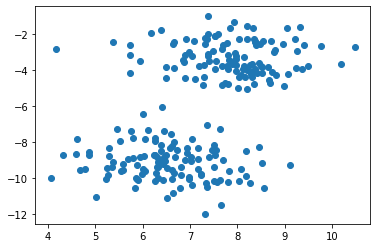

In [ ]:
from matplotlib import pyplot as plt #นำเข้า pyplot โดยตั้งชื่อว่า plt นำมาเพื่อพล็อตกราฟ
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 2 กลุ่ม ตาม centers=2

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

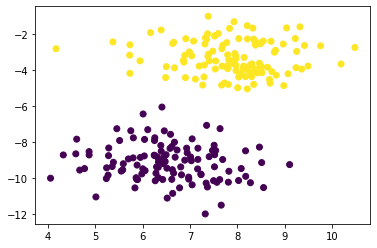

In [ ]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
n_krachukd = 2 # จำนวนกระจุก
n_thamsamd = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueakd = np.random.choice(len(Xd),n_krachukd,replace=0)
X_cend = Xd[sumlueakd] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsamd):
    raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumd = raya2d.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachukd):
        if(len(Xd[klumd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[klumd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

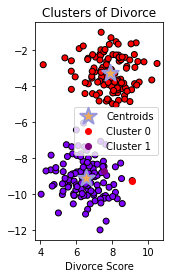

In [ ]:
raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = raya2d.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Divorce')
plt.xlabel('Divorce Score')
plt.legend()
plt.show()
#คือการกำหนดหัวเรื่องเพื่อให้มองชัดขึ้นว่าเรื่องนี้เป็นเรื่องอะไร และมีการกำหนดว่า สีที่ปรากฏหมายถึงค่าของอะไร รวมถึงการทำการกำหนดจุดcentriodด้วย

In [ ]:
ssed = 0
for i in range(n_krachukd):
    ssed += np.sum(raya2d[zd==i,i])
print(ssed)
#พิจารณาผลรวมของระยะห่างระหว่างจุดข้อมูลไปยังเซนทรอยด์นั้นๆ ซึ่งเรียกว่าผลรวมความคลาดเคลื่อนกำลังสอง (sum of squared errors, SSE)

441.6649398259426


In [ ]:
KMclust.cluster_centers_ #คือตำแหน่งของจุดเซนทรอยด์ที่ได้มา จะมีขนาดเท่ากับ (จำนวนเซนทรอยด์,จำนวนมิติ)

array([[ 6.52197226, -9.14345366],
       [ 7.87196532, -3.3106615 ]])

In [ ]:
KMclust.transform(Xd) # ระยะห่างของแต่ละจุดกับ centroid

array([[2.58812072, 6.07818896],
       [1.08916909, 5.41329002],
       [1.02938588, 6.65103988],
       [0.13717964, 5.98566745],
       [5.04589266, 1.10596487],
       [3.07825655, 3.1216285 ],
       [0.95903455, 6.51094188],
       [5.92481775, 1.4838563 ],
       [0.49071356, 5.66771389],
       [6.63157134, 1.01523567],
       [2.43885354, 8.25843303],
       [5.09055468, 1.14877955],
       [7.04180681, 1.05728964],
       [1.13798141, 4.85539689],
       [6.76148225, 1.20519058],
       [0.3298308 , 6.29229091],
       [1.08655544, 6.72597871],
       [0.94202163, 6.88570053],
       [4.52134607, 1.50006398],
       [6.12405594, 1.69385492],
       [0.17990239, 5.94928238],
       [1.72022271, 7.65009602],
       [0.89236745, 5.12640058],
       [8.16547383, 2.33798037],
       [1.86807828, 4.38229583],
       [4.40907744, 1.68800731],
       [1.40651594, 6.85445645],
       [1.45933878, 6.7877501 ],
       [1.138276  , 7.06392898],
       [5.69020787, 0.80168853],
       [5.

In [ ]:
KMclust.labels_ #ผลการแบ่งกลุ่มของข้อมูลที่ใช้เรียนรู้

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
ssdd=[] #ssdd เซ็ทว่างของการหย่า
for k in range(2, 10):
    m=KMeans(n_clusters=k) 
    m.fit(Xd)
    ssdd.append([k, m.inertia_])
ssdd
#K-Means จะตัดแบ่ง (Partition) วัตถุออกเป็น K กลุ่ม  และแทนค่าแต่ละกลุ่มด้วยค่าเฉลี่ยของกลุ่ม ซึ่งใช้เป็นจุดศูนย์กลาง (centroid) ของกลุ่มในการวัดระยะห่างของข้อมูลในกลุ่มเดียวกัน
#สร้าง ssd เป็นเซตว่าง แล้วกำหนดค่า k ตั้งแต่ 2 ถึง 10 จากนั้นทำการวนลูป for เพื่อหาค่า k means ของแต่ละ k 
#จากผลสรุปได้ว่าตารางนี้ควรจัดกลุ่มเป็น 2 กลุ่ม เนื่องจากมีค่า k means สูงที่สุด

[[2, 441.6649398259427],
 [3, 358.46026820735864],
 [4, 283.0527002658164],
 [5, 231.80502526140293],
 [6, 184.07663231787365],
 [7, 165.64957672345565],
 [8, 148.09767520956873],
 [9, 131.90495454529858]]

In [ ]:
xyd= np.array(ssdd) #ssdd เซ็ทว่างของการหย่า
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[  2.         441.66493983]
 [  3.         358.46026821]
 [  4.         283.05270027]
 [  5.         231.80502526]
 [  6.         184.07663232]
 [  7.         165.64957672]
 [  8.         148.09767521]
 [  9.         131.90495455]]


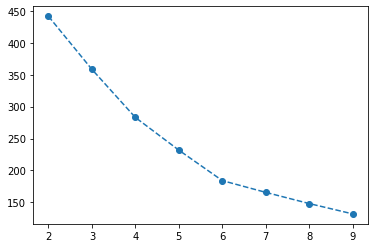

In [ ]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า


#จากกราฟด้านบนจะเห็นว่า ค่าK จะเท่ากับ 5 เนื่องจากเป็นมุมที่คมที่สุดของกราฟ ดังนั้นค่าที่ดีที่สุดสำหรับ K คือ 5

In [ ]:
ddd=pd.DataFrame(ssdd, columns=['k', 'ssdd']) #ddd ตัวแปรของการหย่า
ddd

,k,ssdd
0,2,441.664940
1,3,358.460268
2,4,283.052700
3,5,231.805025
4,6,184.076632
5,7,165.649577
6,8,148.097675
7,9,131.904955


In [ ]:
ddd['pct_chg']=ddd['ssdd'].pct_change() * 100
ddd

,k,ssdd,pct_chg
0,2,441.664940,NaN
1,3,358.460268,-18.838867
2,4,283.052700,-21.036521
3,5,231.805025,-18.105348
4,6,184.076632,-20.589887
5,7,165.649577,-10.010535
6,8,148.097675,-10.595802
7,9,131.904955,-10.933812


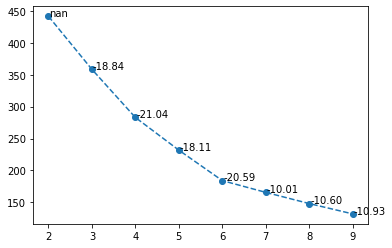

In [ ]:
plt.plot(ddd['k'], ddd['ssdd'], linestyle='--', marker='o')
for index, row in ddd.iterrows():
    plt.text(row['k']+.02, row['ssdd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

> **นำเข้ากลุ่มที่จัดไว้โดยการเพิ่มที่คอลัม cluster โดยที่กลุ่ม 0 คือ จำนวนคู่หย่ามาก กลุ่ม 1 คือ จำนวนคู่หย่าน้อย**

In [ ]:
divorce_1['cluster']=KMclust.labels_
divorce_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1


In [ ]:
divorce_1.groupby('cluster').describe().T #ดูรายละเอียดในตารางนี้

cluster                      0             1
couple_div count    116.000000    114.000000
           mean    1500.017241   1329.982456
           std     2133.074690   1580.821412
           min      218.000000    134.000000
           25%      628.250000    688.750000
           50%     1012.000000   1020.000000
           75%     1682.500000   1480.750000
           max    16608.000000  15175.000000

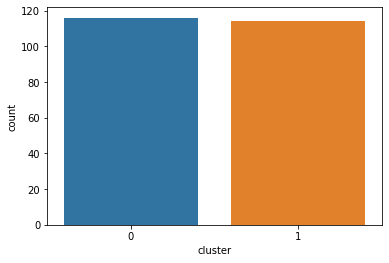

In [ ]:
sns.countplot(x='cluster', data=divorce_1) #สร้างกราฟแท่งดูว่าแค่ละกลุ่มมีจำนวนเท่าไหร่ จากรูป

In [ ]:
divorce_1

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
...,...,...,...
226,ตรัง 55,742.0,1
227,พัทลุง 55,704.0,0
228,ปัตตานี 55,255.0,0
229,ยะลา 55,301.0,0


In [ ]:
divorce_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
5,อ่างทอง 53,497.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
7,สิงห์บุรี 53,409.0,1
9,สระบุรี 53,1618.0,1
11,ระยอง 53,2335.0,1
12,จันทบุรี 53,806.0,1


In [ ]:
divorce_1.rename(columns={'cluster':'C_Divorce'},inplace=True) #เปลี่ยนชื่อจากคอลัม cluster เป็น C_Debt
divorce_1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,จังหวัด,couple_div,C_Divorce
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,1
...,...,...,...
226,ตรัง 55,742.0,1
227,พัทลุง 55,704.0,0
228,ปัตตานี 55,255.0,0
229,ยะลา 55,301.0,0


### ข้อมูลตารางที่ 2 จำนวนหนี้สินโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ.2553-2555
ซึ่งมีคอลัม จังหวัด และ จำนวนหนี้สินโดยเฉลี่ย

In [ ]:
avg_Debt_1 = os.path.join(path,'avg_Debt_1.csv') #การกำหนดตัวแปรเพื่อมารับข้อมูลในไฟล์ avg_Debt_1.csv

In [ ]:
avg_Debt_1 = pd.read_csv(avg_Debt_1) #อ่านข้อมูล
avg_Debt_1

,จังหวัด,avg_debt
0,กรุงเทพมหานคร 53,207665.0
1,สมุทรปราการ 53,117360.8
2,นนทบุรี 53,240769.0
3,ปทุมธานี 53,220761.2
4,พระนครศรีอยุธยา 53,163424.5
...,...,...
226,ตรัง 55,160207.0
227,พัทลุง 55,162248.7
228,ปัตตานี 55,109102.5
229,ยะลา 55,35828.9


In [ ]:
avg_Debt_1.shape #ได้ว่าข้อมูลนี้มี 231 แถว 2 คอลัม

(231, 2)

In [ ]:
avg_Debt_1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม avg_debt มีค่าว่างอยู่

จังหวัด     False
avg_debt     True
dtype: bool

In [ ]:
avg_Debt_1 = avg_Debt_1.dropna() #แก้ไข missing valua โดยดรอปช่องที่ว่าง

In [ ]:
avg_Debt_1.isnull().any() #ตรวจสอบค่าว่างอีกรอบ พบว่าไม่มีค่าว่างอยู่แล้ว

จังหวัด     False
avg_debt    False
dtype: bool

In [ ]:
avg_Debt_1.shape  #หลังจากดรอปแล้วจะพบว่าข้อมูลนี้มี 229 แถว 2 คอลัม

(229, 2)

### ข้อมูลตารางที่ 3 รายได้โดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ.2553 - 2555
ซึ่งมีคอลัม จังหวัด และ รายได้โดยเฉลี่ย

In [ ]:
avg_Income_1 = os.path.join(path,'avg_Income_1.csv') #การกำหนดตัวแปรเพื่อมารับข้อมูลในไฟล์ avg_Income_1.csv

In [ ]:
avg_Income_1 = pd.read_csv(avg_Income_1) 
avg_Income_1

,จังหวัด,avg_income
0,กรุงเทพมหานคร 53,42380.0
1,สมุทรปราการ 53,23359.0
2,นนทบุรี 53,34626.0
3,ปทุมธานี 53,26686.0
4,พระนครศรีอยุธยา 53,25820.0
...,...,...
226,ตรัง 55,33269.9
227,พัทลุง 55,26169.3
228,ปัตตานี 55,20199.1
229,ยะลา 55,22483.1


In [ ]:
avg_Income_1.shape #ได้ว่าข้อมูลนี้มี 231 แถว 2 คอลัม

(231, 2)

In [ ]:
avg_Income_1.isnull().any() #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม avg_income มีค่าว่างอยู่

จังหวัด       False
avg_income     True
dtype: bool

In [ ]:
avg_Income_1 = avg_Income_1.dropna()  #แก้ไข missing valua โดยดรอปช่องที่ว่าง

In [ ]:
avg_Income_1.isnull().any() #ตรวจสอบค่าว่างอีกรอบ พบว่าไม่มีค่าว่างอยู่แล้ว

จังหวัด       False
avg_income    False
dtype: bool

In [ ]:
avg_Income_1.shape  #หลังจากดรอปแล้วจะพบว่าข้อมูลนี้มี 229 แถว 2 คอลัม

(229, 2)

### ข้อมูลตารางที่ 4 ค่าใช้จ่ายโดยเฉลี่ยต่อครัวเรือน จำแนกตามจังหวัด พ.ศ.2553 - 2555
ซึ่งมีคอลัม จังหวัด และ ค่าใช้จ่ายโดยเฉลี่ย

In [ ]:
avg_Expenditure_1 = os.path.join(path,'avg_Expenditure_1.csv') #การกำหนดตัวแปรเพื่อมารับข้อมูลในไฟล์ avg_Expenditure_1.csv

In [ ]:
avg_Expenditure_1 = pd.read_csv(avg_Expenditure_1)
avg_Expenditure_1

,จังหวัด,avg_expenditure
0,กรุงเทพมหานคร 53,30334.0
1,สมุทรปราการ 53,18450.0
2,นนทบุรี 53,29487.0
3,ปทุมธานี 53,22460.0
4,พระนครศรีอยุธยา 53,20717.0
...,...,...
226,ตรัง 55,20922.3
227,พัทลุง 55,16635.7
228,ปัตตานี 55,16668.1
229,ยะลา 55,12521.7


In [ ]:
avg_Expenditure_1.shape #ได้ว่าข้อมูลนี้มี 231 แถว 2 คอลัม

(231, 2)

In [ ]:
avg_Expenditure_1.isnull().any()  #เชคว่าภายในตารางมีค่าว่างหรือไม่ จากผลจะเห็นได้ว่าคอลัม avg_expenditure  มีค่าว่างอยู่

จังหวัด            False
avg_expenditure     True
dtype: bool

In [ ]:
avg_Expenditure_1 = avg_Expenditure_1.dropna() #แก้ไข missing valua โดยดรอปช่องที่ว่าง

In [ ]:
avg_Expenditure_1.isnull().any() #ตรวจสอบค่าว่างอีกรอบ พบว่าไม่มีค่าว่างอยู่แล้ว

จังหวัด            False
avg_expenditure    False
dtype: bool

In [ ]:
avg_Expenditure_1.shape #หลังจากดรอปแล้วจะพบว่าข้อมูลนี้มี 229 แถว 2 คอลัม

(229, 2)

#การรวมข้อมูล
จากการที่จัดกลุ่มในสี่ตารางแล้ว จึงทำการรวมตารางโดยใช้คีย์เป็นตัวเชื่อมคือจังหวัด

In [ ]:
New_table = avg_Debt_1.merge(avg_Income_1,how='left',left_on='จังหวัด',right_on='จังหวัด') #สร้างตัวแปร New_table มารับการรวมตารางของตาราง avg_Debt_1 กับ avg_Income_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
New_table #โดยเริ่มคอลัมจากทางซ้าย 

,จังหวัด,avg_debt,avg_income
0,กรุงเทพมหานคร 53,207665.0,42380.0
1,สมุทรปราการ 53,117360.8,23359.0
2,นนทบุรี 53,240769.0,34626.0
3,ปทุมธานี 53,220761.2,26686.0
4,พระนครศรีอยุธยา 53,163424.5,25820.0
...,...,...,...
224,ตรัง 55,160207.0,33269.9
225,พัทลุง 55,162248.7,26169.3
226,ปัตตานี 55,109102.5,20199.1
227,ยะลา 55,35828.9,22483.1


In [ ]:
NNew_table = New_table.merge(avg_Expenditure_1,how='left',left_on='จังหวัด',right_on='จังหวัด')  #สร้างตัวแปร NNew_table มารับการรวมตารางของตาราง New_table กับ avg_Expenditure_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
NNew_table

,จังหวัด,avg_debt,avg_income,avg_expenditure
0,กรุงเทพมหานคร 53,207665.0,42380.0,30334.0
1,สมุทรปราการ 53,117360.8,23359.0,18450.0
2,นนทบุรี 53,240769.0,34626.0,29487.0
3,ปทุมธานี 53,220761.2,26686.0,22460.0
4,พระนครศรีอยุธยา 53,163424.5,25820.0,20717.0
...,...,...,...,...
224,ตรัง 55,160207.0,33269.9,20922.3
225,พัทลุง 55,162248.7,26169.3,16635.7
226,ปัตตานี 55,109102.5,20199.1,16668.1
227,ยะลา 55,35828.9,22483.1,12521.7


In [ ]:
NNNew_table = NNew_table.merge(divorce_1,how='left',left_on='จังหวัด',right_on='จังหวัด') #สร้างตัวแปร NNNew_table มารับการรวมตารางของตาราง NNew_table กับ divorce_1 โดยการใช้คอลัมจังหวัดเป็นคีย์เชื่อมทั้งสองตาราง
NNNew_table

,จังหวัด,avg_debt,avg_income,avg_expenditure,couple_div,C_Divorce
0,กรุงเทพมหานคร 53,207665.0,42380.0,30334.0,16608.0,0
1,สมุทรปราการ 53,117360.8,23359.0,18450.0,3683.0,0
2,นนทบุรี 53,240769.0,34626.0,29487.0,2389.0,0
3,ปทุมธานี 53,220761.2,26686.0,22460.0,2370.0,0
4,พระนครศรีอยุธยา 53,163424.5,25820.0,20717.0,1981.0,1
...,...,...,...,...,...,...
224,ตรัง 55,160207.0,33269.9,20922.3,742.0,1
225,พัทลุง 55,162248.7,26169.3,16635.7,704.0,0
226,ปัตตานี 55,109102.5,20199.1,16668.1,255.0,0
227,ยะลา 55,35828.9,22483.1,12521.7,301.0,0


In [ ]:
X1 = NNNew_table #สร้างตัวแปร x1 รับข้อมูลในตาราง NNNew_table
X1

,จังหวัด,avg_debt,avg_income,avg_expenditure,couple_div,C_Divorce
0,กรุงเทพมหานคร 53,207665.0,42380.0,30334.0,16608.0,0
1,สมุทรปราการ 53,117360.8,23359.0,18450.0,3683.0,0
2,นนทบุรี 53,240769.0,34626.0,29487.0,2389.0,0
3,ปทุมธานี 53,220761.2,26686.0,22460.0,2370.0,0
4,พระนครศรีอยุธยา 53,163424.5,25820.0,20717.0,1981.0,1
...,...,...,...,...,...,...
224,ตรัง 55,160207.0,33269.9,20922.3,742.0,1
225,พัทลุง 55,162248.7,26169.3,16635.7,704.0,0
226,ปัตตานี 55,109102.5,20199.1,16668.1,255.0,0
227,ยะลา 55,35828.9,22483.1,12521.7,301.0,0


In [ ]:
Data = X1[['จังหวัด','C_Divorce','avg_debt','avg_income','avg_expenditure']]
Data #เลือกเฉพาะคอลัมที่ต้องการได้ดังนี้

,จังหวัด,C_Divorce,avg_debt,avg_income,avg_expenditure
0,กรุงเทพมหานคร 53,0,207665.0,42380.0,30334.0
1,สมุทรปราการ 53,0,117360.8,23359.0,18450.0
2,นนทบุรี 53,0,240769.0,34626.0,29487.0
3,ปทุมธานี 53,0,220761.2,26686.0,22460.0
4,พระนครศรีอยุธยา 53,1,163424.5,25820.0,20717.0
...,...,...,...,...,...
224,ตรัง 55,1,160207.0,33269.9,20922.3
225,พัทลุง 55,0,162248.7,26169.3,16635.7
226,ปัตตานี 55,0,109102.5,20199.1,16668.1
227,ยะลา 55,0,35828.9,22483.1,12521.7


# KNN

In [ ]:
from sklearn.model_selection import train_test_split 

> โดยจะกำหนดแบ่ง train กับ test โดย test size = 0.2 

In [ ]:
X1 = Data.iloc[:,2:4] #กำหนดค่า X โดยให้เอาทุกแถว ตั้งแต่คอลัมที่ 2 ถึง 5
y1 = Data.iloc[:,1] #กำหนดค่า y โดยให้เอาทุกแถว เฉพาะคอลัมที่ 1
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=1, stratify=y1)


>**Import**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

>**Define** นิยามโมเดล

In [ ]:
myKNN=KNeighborsClassifier(n_neighbors=9) #n_neighbors คือ จำนวนเพื่อนบ้านที่จะพิจารณา

>**Train** เพื่อสร้างโมเดล

In [ ]:
myKNN.fit(X_train,y_train) #input มี2ตัว คือ X และ y 
#โดยใช้น้ำหนักแต่ละจุดเท่ากัน

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

>**Test** ใช้คำสั่ง .predict โดยที่ข้อมูลมากจาก X_test

In [ ]:
myKNN.predict(X_test) #โดยใช้ predict ทำนายว่าตัวที่ใกล้สุด 3 ตัวแรก คือ 2

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0], dtype=int32)

>ใช้คำสั่ง .predict_proba เป็นการคำนวณความน่าจะเป็นว่า ข้อมูลค่าใช้จ่าย รายได้ หนี้สินที่นำเข้าโมเดลนั้นจะอยู่กลุ่มไหนของการหย่ากี่เปอร์เซ็นต์

In [ ]:
myKNN.predict_proba(X_test)

array([[0.55555556, 0.44444444],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.22222222, 0.77777778],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.77777778, 0.22222222],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.55555556, 0.44444444],
       [0.66666667, 0.33333333],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.

> ตรวจสอบความแม่นยำของโมเดล ว่าสามารถจำแจกกลุ่มการหย่า ว่าอยู่กลุ่มมาก กลุ่มน้อย ได้ที่ความแม่นยำกี่เปอร์เซ็นต์

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(myKNN, X_train, y_train, cv=12).mean()

0.513888888888889

>**สรุปได้ว่า** ค่าใช้จ่าย รายรับ หนี้สินโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 51.38% เมื่อใช้โมเดล KNN

#Desition Tree

>**Import**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

>**Define**

In [ ]:
myTree=DecisionTreeClassifier(criterion='entropy',max_depth=2)
#criterion คือ default เป็น ‘gini’ ซึ่งเราสามารถจะเลือกเป็น ‘entropy’ 
#max_depth ความลึกของ tree หรือจำนวน level ที่มากที่สุด ของ node ที่จะทำการ split

>**Train**

In [ ]:
myTree.fit(X_train,y_train) #กำหนดขอบเขตของข้อมูล

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

>**Test**

In [ ]:
y_pred = myTree.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int32)

>**Draw Tree**

In [ ]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[0] <= 150403.047\nentropy = 1.0\nsamples = 183\nvalue = [92, 91]'),
 Text(83.7, 108.72, 'X[1] <= 16999.4\nentropy = 0.987\nsamples = 118\nvalue = [51, 67]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.99\nsamples = 43\nvalue = [24, 19]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.943\nsamples = 75\nvalue = [27, 48]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 157076.602\nentropy = 0.95\nsamples = 65\nvalue = [41, 24]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.971\nsamples = 60\nvalue = [36, 24]')]

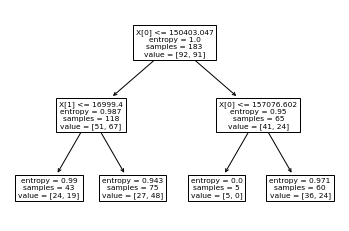

In [ ]:
plot_tree(myTree)

>**Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cross_val_score(myTree, X_train, y_train, cv=12).mean()

0.48159722222222223

>**สรุปได้ว่า** ค่าใช้จ่าย รายรับ หนี้สินโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 48.15% เมื่อใช้โมเดล Decision Tree

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
skRF = RandomForestClassifier(random_state=231)
skRF.fit(X_train,y_train)
skRF.score(X1,y1)
y_predrf = skRF.predict(X_test)
y_predrf

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0], dtype=int32)

In [ ]:
cross_val_score(skRF, X_train, y_train, cv=12).mean()

0.5090277777777779

>**สรุปได้ว่า** ค่าใช้จ่าย รายรับ หนี้สินโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ความแม่นยำ 50.90% เมื่อใช้โมเดล RF



---



---


#จากการทำทั้งสามโมเดลการทำนายพบว่าค่าใช้จ่าย รายรับ หนี้สินโดยเฉลี่ย สามารถทำนายจำนวนคู่หย่าว่าแต่ละจังหวัดจัดอยู่ในกลุ่มมากหรือน้อยได้ ที่มีความความแม่นยำมากที่สุดจากทั้งสามโมเดลคือ KNN โดยมีความแม่นยำ  51.38% 

---

